In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import math

In [69]:
data=pd.read_csv('/content/dataset.csv',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [71]:
data.head(1)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter


In [72]:
data["reviews.numHelpful"].unique()

array([  0.,   1.,   2.,   3.,  55.,   4.,  24.,  11.,  42.,  62.,   7.,
         8.,   6.,  10.,  36.,  16.,  15.,  13.,   5., 271., 730., 221.,
        53.,  nan,   9., 105.,  19.,  25.,  21.,  14.,  20.,  22.,  12.,
        96., 102.,  34.,  17.,  73., 109.,  27.,  39.,  57.,  18.,  40.,
        33., 112., 355.,  60., 263.,  37.,  28., 103.,  26.,  32.,  43.,
        64.,  23., 650., 780., 740., 139., 126.,  69.,  75.,  48., 292.,
       144.,  93.,  49.,  95.,  31.,  63., 204., 270.,  82., 174.,  98.,
        84., 629., 163., 422., 261., 185., 205., 132., 170., 814., 434.,
       302.,  54.,  30.,  46., 660., 195., 744., 384., 238., 217.])

In [73]:
df=data[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data=>",df.shape)
df.head(6)

Shape of data=> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This amazon fire 8 inch tablet is the perfect ...,True,0.0


In [74]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [75]:
df.dropna(inplace=True)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [76]:
# To have a proper analysis of the data, we need to ensure that we have products with at least 500 reviews. 
# We shall filter out such entries using functions such as filter() and lambda function

df=df.groupby('name').filter(lambda x: len(x)>500).reset_index(drop=True)
print('Number of products=>',len(df['name'].unique()))
df.head(5)

Number of products=> 8


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [77]:
#From the dataset we can see that 'reviews.doRecommend' has entries such as True or False.
# Let's convert this to binary values 1 or 0.
# The column 'reviews.numHelpful' has floating point values, we shall be converting this also to integer values.

df['reviews.doRecommend']=df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)




Cleaning Text Data in Python


In [78]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [79]:
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

In [80]:
for index,text in enumerate(df['reviews.text'][30:40]):
  print("Review %d\n"%(index+1),text)

Review 1
 If your looking for a affordable gift this is it!.
Review 2
 This is a great tablet for the price, would recommend it to anyone looking for a basic tablet.
Review 3
 Works great. Love the portability of books. Overall great product
Review 4
 I am still learning all the things I can do with my new Kindle Fire. It is so much better (lighter in weight and easier to use) than my old tablet.
Review 5
 Just the right size for reading books and playing some games.
Review 6
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 7
 Overall a nice product for traveling purposes Value for money
Review 8
 My children love this table great quality of pictures, excellent camera
Review 9
 I bought 3 tablets and my family was not disappointed.
Review 10
 Great tablet fast screen good size never gives me problem


In [81]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}



contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))



def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace,text)



df['reviews.text']=df['reviews.text'].apply(lambda x: expand_contractions(x))

In [82]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [83]:
# Our corpus also has number and words with digits in them.
# They do not add much value to the data and hence we shall remove them.


df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [84]:
#We shall now remove the extra spaces in our corpus.
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(" +"," ",x))


In [85]:
for index,text in enumerate(df['cleaned'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 i love everything about this tablet! the imaging is sharp and clear. it is fast and light weight. love it!
Review 2:
 overall a nice product for traveling purposes value for money
Review 3:
 my children love this table great quality of pictures, excellent camera
Review 4:
 i bought tablets and my family was not disappointed.
Review 5:
 great tablet fast screen good size never gives me problem


In [87]:
import spacy
#loading model
nlp=spacy.load('en_core_web_sm',disable=['parser','ner'])

#lemmatization with stopwords removel
df['lemmatization']=df['cleaned'].apply(lambda x:' '.join(token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)))

In [89]:
df_grouped=df[['name','lemmatization']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatization
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint . child love use like a...
Amazon Fire Tv,"echo learn everyday use daily , use place spea..."
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow . wish investigate little...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand . work perfectly . purch...
Echo (White),"compete ipad high end android tablet , easily ..."


In [92]:
# creating document matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatization'])
df_dtm=pd.DataFrame(data.toarray(),columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aamazon,abandon,abc,abcmouse,abcs,abd,ability,abilty,abit,abke,able,abnormal,abode,abook,abound,abount,about,abroad,abruptly,absence,absofbe,absoluitely,absolute,absolutely,absolutly,absorb,abt,abundance,abundant,abuse,ac,academic,acc,acce,accedently,accelerometer,accent,accept,...,yhis,yield,ymmv,ynab,yo,yoga,yokod,yonomi,yopu,york,you,youand,young,younger,youngin,youngster,yourbedmate,youreyes,yourself,yous,youse,youth,youtube,youtubekid,youtubing,youversion,yr,yrs,yup,zeepad,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,24,0,1,0,77,0,0,0,0,1,0,0,0,0,0,0,3,33,0,0,0,0,0,2,0,0,1,1,0,0,0,2,...,0,0,0,0,1,1,0,0,0,1,0,1,20,0,0,0,0,1,0,0,0,1,38,0,0,0,23,3,0,0,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,37,0,0,0,121,0,0,0,0,0,1,0,1,1,0,0,1,49,0,0,0,1,0,0,1,0,0,0,0,0,5,0,...,0,1,0,0,1,0,0,2,2,0,3,0,4,0,0,0,0,0,0,0,0,0,6,0,0,0,2,1,0,0,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,2,0,0,0,57,0,0,0,131,1,0,1,1,0,1,0,0,0,0,0,1,69,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1,4,0,15,0,0,2,1,0,0,0,0,0,4,0,0,0,10,5,0,0,0,4,0,0,0,0,2,0,2,0


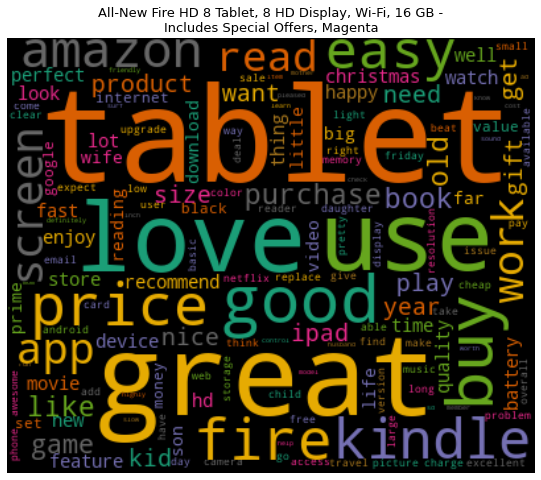

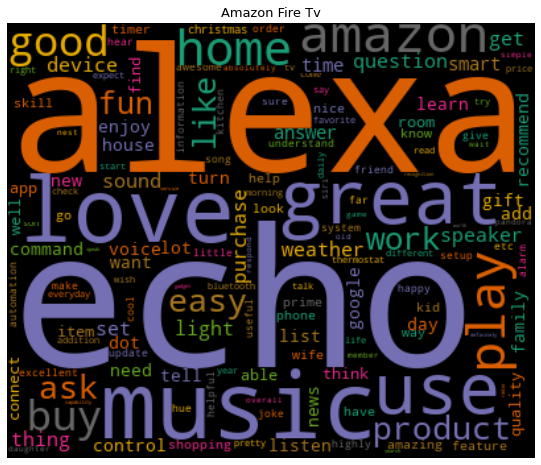

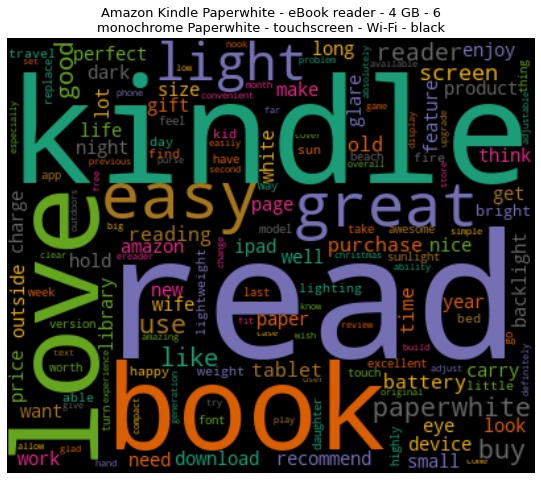

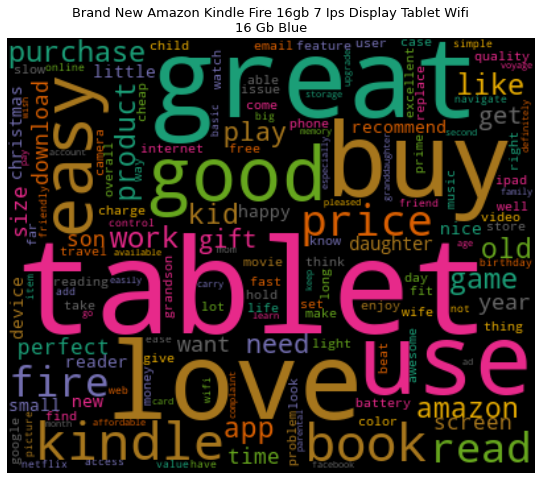

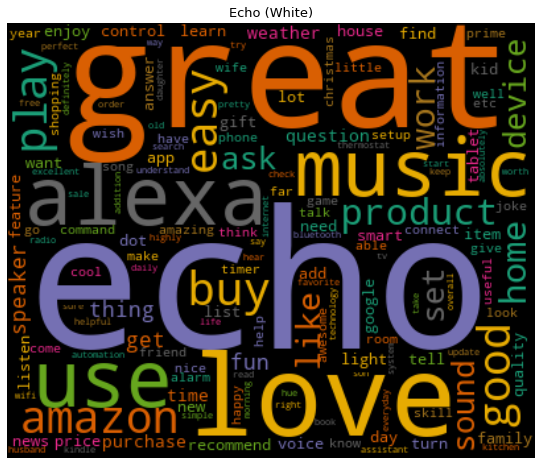

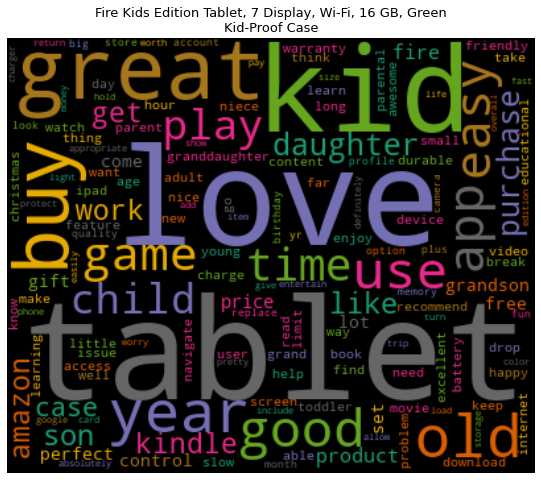

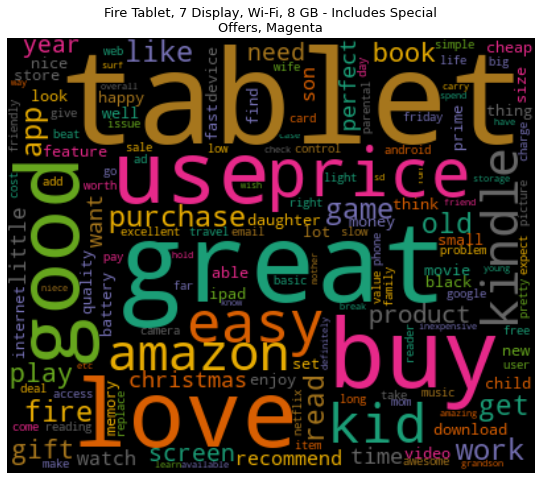

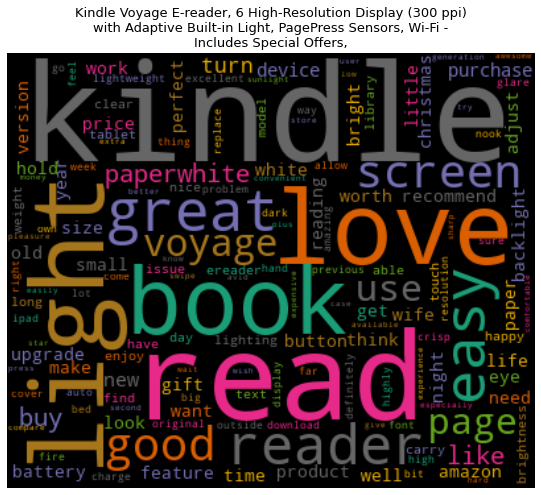

In [95]:
from wordcloud import WordCloud 
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

  # Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)